<a href="https://colab.research.google.com/github/PRyuC/Pascal_INFO5502_Summer2022/blob/main/lab_assignment_08_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Eighth Lab-assignment (08/09/2022 11:59'AM' - 08/12/2022 11:59PM, 50 points in total)

The purpose of this assignment is to practice different Hypothesis Testing and annotation quality evaluation.

### Question 1 (10 points) 

During the 1980s, the general consensus is that about 5% of the nation’s children had autism. Some claimed that increases certain chemicals in the environment has led to an increase in autism. 

(1) Write an appropriate hypothesis test for this situation (5 points).  

(2) Give an appropriate test for this hypothesis, stating what are the necessary conditions for performing the test (5 points). 

(3) A recent study examined 384 children and found that 46 showed signs of autism. Perform a test of the hypothesis and state the p-value (5 points). 

In [ ]:
# You answer here

'''

1) Comparing a population of children with autism with a sample of the current population.
5% of the population or 5/100 = 0.05 so:

Null hypothesis is H0: p = 0.05 (population proportion is equal to 0.05)
Alternative hypothesis is H1: p > 0.05 (population proportion is greater than 0.05)

alpha level used will be 0.05


2) Z-test, specifically the One Sample Proportion Z-Test. Necessary conditions for this test:

a. Random: The data are a simple random sample from the population of interest.
b. Independent: The population is at least 10 times as large as the sample.
c. Normal: The sample must reflect the distribution of the underlying population.

'''

In [5]:
# your code here

#3)

import pandas._testing as tm
from statsmodels.stats.proportion import proportions_ztest

stat, p_value = proportions_ztest(count=46, nobs=384, value=0.05, alternative='larger')

print(stat, p_value)


if p_value > 0.05:
   print ("Fail to reject the null hypothesis")
else:
   print ("Reject the null hypothesis")

4.211755389107901 1.2669692747395513e-05
Reject the null hypothesis


### Question 2 (10 points) 
In this problem,we will examine the sugar content of several national brands of cereals, here measured as a percentage of weight.

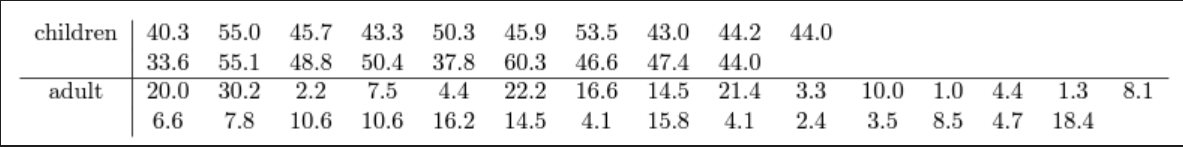

(1) Give a summary of these two datasets (5 points). 

(2) Create side-by-side boxplots and interpret what you see (5 points). 

(3) Use python to create a 95% confidence interval for the difference in mean sugar content and explain your result (5 points). 

In [3]:
# your code here

#(1)

import numpy as np
import pandas as pd

children = np.array([40.3, 55.0, 45.7, 43.3, 50.3, 45.9, 53.5, 43.0, 44.2, 44.0, 33.6, 55.1, 48.8, 50.4, 37.8, 60.3, 46.6, 47.4, 44.0])
adults = np.array([20.0, 30.2, 2.2, 7.5, 4.4, 22.2, 16.6, 14.5, 21.4, 3.3, 10.0, 1.0, 4.4, 1.3, 8.1, 6.6, 7.8, 10.6, 10.6, 16.2, 14.5, 4.1, 15.8, 4.1, 2.4, 3.5, 8.5, 4.7, 18.4])

df_children = pd.DataFrame(children) # creating dataframes
df_adults = pd.DataFrame(adults)

df_children = df_children.rename(columns={0: 'Children'}) # renaming columns
df_adults = df_adults.rename(columns={0: 'Adults'})

In [4]:
df_children.describe() # summary of children dataset 

,Children
count,19.000000
mean,46.800000
std,6.418376
min,33.600000
25%,43.650000
50%,45.900000
75%,50.350000
max,60.300000


In [5]:
df_adults.describe() # summary of adult dataset

,Adults
count,29.000000
mean,10.168966
std,7.475680
min,1.000000
25%,4.100000
50%,8.100000
75%,15.800000
max,30.200000


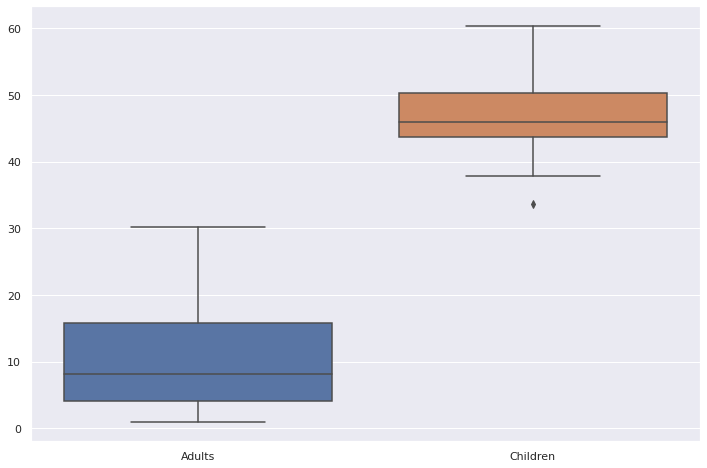

In [9]:
#(2)

from matplotlib import pyplot as plt
import seaborn as sns

merged = df_children.combine_first(df_adults) # merging dataframes

sns.set(rc={'figure.figsize':(12,8)}) # changing figure size
sns.boxplot(data=merged) # creating boxplot

'''

We can seen from the boxplots that both datasets are seemingly quite different,
For the children group: there is one outlier in the children boxplot, the upper 
quartile is about 50, the lower quartile about 43. The median is around 45 to 46, 
upper quartile minus around 61 and lower quartile minus around 38.

On the other hand, for the adults group, there is no outlier, the upper quartile 
is about 15 or 16, the lower quartile about 4. The median around 8, upper quartile 
minus around 30 and lower quartile minus around 1 or 2.

'''

In [53]:
# (3)

import numpy as np
import statsmodels.stats.api as sms

# calculating variance, can assume populations have equal variances if ratio of larger sample variance to smaller sample variance less than 4:1
print(np.var(children), np.var(adults), '\n')  #53.96/39.03 = 1.38 so we can assume that the population variances are equal

group1 = children
group2 = adults

compare_means = sms.CompareMeans(sms.DescrStatsW(group1), sms.DescrStatsW(group2))
print(compare_means.tconfint_diff(usevar='pooled')) #pooled if we assume equal variance


# '''
# This mean we can have a 95% confidence that the mean difference is between 32.42 and 40.84
# '''

39.02736842105263 53.958692033293694 

(32.42428034751851, 40.83778861799875)


In [54]:
# performing a t-test (two sample, equal variance)

import scipy.stats as stats
print(stats.ttest_ind(a=children, b=adults, equal_var=True))


'''
The p-value is much much lower than alpha=0.05, we can then reject the null hypothesis 
meaning there is sufficient evidence to say that the mean between the two populations is different
'''

Ttest_indResult(statistic=17.52763427359664, pvalue=5.440019445168912e-22)


In [51]:
# confirming results with another code found online for future reference

import numpy as np
from scipy import stats

alpha = 0.05

sample1 = children
sample2 = adults

n_sample1 = len(sample1)
n_sample2 = len(sample2)

xbar1 = np.mean(sample1)
xbar2 = np.mean(sample2) 

var_sample1 = np.var(sample1, ddof = 1)
var_sample2 = np.var(sample2, ddof = 1)

df = n_sample1 + n_sample2 - 2 
pooled_var = ((n_sample1-1)*var_sample1 + (n_sample2-1)*var_sample2) / df
radius = pooled_var*(1/n_sample1 + 1/n_sample2)

# if we assume not equal variance
# ratio1 = var_sample1/n_sample1
# ratio2 = var_sample2/n_sample2
# df = (ratio1 + ratio2)**2 / (ratio1**2/(n_sample1-1) + ratio2**2/(n_sample2-1))
# radius = ratio1 + ratio2

from scipy import stats

# Find the critical value from the normal distribution
alpha = 0.05
critical_val = stats.t.ppf(q = 1-alpha/2, df = df)

# Find the lower and upper bound of the confidence interval
upper_bound = (xbar1 - xbar2) + critical_val*np.sqrt(radius)
lower_bound = (xbar1 - xbar2) - critical_val*np.sqrt(radius)
lower_bound, upper_bound

(32.424280347518504, 40.83778861799874)

### Question 3 (30 points) 

Cohen's kappa coefficient (κ) is a statistic that is used to measure inter-rater reliability (and also intra-rater reliability) for qualitative (categorical) items. It is generally thought to be a more robust measure than simple percent agreement calculation, as κ takes into account the possibility of the agreement occurring by chance. There is controversy surrounding Cohen's kappa due to the difficulty in interpreting indices of agreement. Some researchers have suggested that it is conceptually simpler to evaluate disagreement between items.

A more detailed description of Kappa agreement can be found on wikipedia: https://en.wikipedia.org/wiki/Cohen%27s_kappa

Here is the dataset we created for a text classification task: https://github.com/suthapalliuday/INFO5502-Summer2022/blob/main/datasets/lab08-dataset.csv

The last three columns indicate the annotation on the same sentence by three students respectively. Based on this dataset, please calculate the Cohen's kappa and the Fleiss' kappa using their formulars (Python). Please don't use any existing packages for the implementation. 

In [55]:
# your code here

import pandas as pd

df = pd.read_csv('lab08-dataset.csv')

In [56]:
df = df[['Annotation1', 'Annotation2', 'Annotation3']] # only keeping necessary columns

In [57]:
df.head(2)

,Annotation1,Annotation2,Annotation3
0,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization,Algorithms/ Methods Construction or Optimization
1,Theory proposal\n,Theory proposal\n,Theory proposal\n


In [58]:
df.describe() # looking at data, 8 columns in Ann1, lots of \n

,Annotation1,Annotation2,Annotation3
count,3398,3398,3398
unique,8,7,7
top,Theory proposal\n,Theory proposal\n,Theory proposal\n
freq,1323,1548,1408


In [59]:
df = df.applymap(lambda x: x.replace('"', '')) #lambda functions in applymap method to replace "" with nothing
df = df.applymap(lambda x: x.replace('\n', '')) #\n, with nothing
df = df.applymap(lambda x: x.replace(' ', '')) # space with nothing to make sure all are the same

In [60]:
print(df.Annotation1.value_counts()) # printing value counts for each value and rater
print()                              # to check all categories are the same which they are
print(df.Annotation2.value_counts())
print()
print(df.Annotation3.value_counts())

Theoryproposal                                  1324
Algorithms/MethodsConstructionorOptimization     579
ModelConstructionorOptimization                  555
PerformanceEvaluation                            474
Resources                                        245
Applications                                     119
Datasetcreation                                  102
Name: Annotation1, dtype: int64

Theoryproposal                                  1548
ModelConstructionorOptimization                  506
Algorithms/MethodsConstructionorOptimization     494
PerformanceEvaluation                            390
Resources                                        265
Applications                                     112
Datasetcreation                                   83
Name: Annotation2, dtype: int64

Theoryproposal                                  1408
Algorithms/MethodsConstructionorOptimization     556
ModelConstructionorOptimization                  515
PerformanceEvaluation            

In [7]:
# commented out, not necessary

# for col_name in df.columns:                             #for loop for every colum
#     if(df[col_name].dtype == 'object'):                 # to change categorical to a numerical value reprensation
#         df[col_name]= df[col_name].astype('category')   
#         df[col_name] = df[col_name].cat.codes

In [61]:
# test = df[["Annotation1", "Annotation2", "Annotation3"]].to_numpy() # transform the 3 columns to numpy arrays, not necessary

r1 = df[['Annotation1']]   # assigning each specific colum to a rater
r2 = df[['Annotation2']]
r3 = df[['Annotation3']]

In [62]:
df.head()

,Annotation1,Annotation2,Annotation3
0,Algorithms/MethodsConstructionorOptimization,Algorithms/MethodsConstructionorOptimization,Algorithms/MethodsConstructionorOptimization
1,Theoryproposal,Theoryproposal,Theoryproposal
2,Theoryproposal,Algorithms/MethodsConstructionorOptimization,Theoryproposal
3,Theoryproposal,Theoryproposal,Theoryproposal
4,Algorithms/MethodsConstructionorOptimization,ModelConstructionorOptimization,Algorithms/MethodsConstructionorOptimization


Rater 1 and Rater 2

In [63]:
from sklearn.metrics import confusion_matrix #making a confusion matrix table to calculate cohen's kappa manually

confusion_matrix(r1, r2)

array([[288,  14,   3,  50,  31,  43, 150],
       [ 12,  28,   3,  11,  13,   8,  44],
       [  3,   6,  50,   3,   6,  11,  23],
       [ 44,  13,   6, 314,  20,  23, 135],
       [ 41,  17,   4,  29, 237,  23, 123],
       [ 15,   5,   8,  17,  16,  68, 116],
       [ 91,  29,   9,  82,  67,  89, 957]])

In [64]:
#agreement (po)

po1_2 = (288 + 28 + 50 + 314 + 237 + 68 + 957) / 3398  # sum of diagonal meaning raters agree / total observations
po1_2

0.5715126545026487

In [65]:
# summing each row and column values

row1 = sum([288,  14,   3,  50,  31,  43, 150])
row2 = sum([ 12,  28,   3,  11,  13,   8,  44])
row3 = sum([  3,   6,  50,   3,   6,  11,  23])
row4 = sum([ 44,  13,   6, 314,  20,  23, 135])
row5 = sum([ 41,  17,   4,  29, 237,  23, 123])
row6 = sum([ 15,   5,   8,  17,  16,  68, 116])
row7 = sum([ 91,  29,   9,  82,  67,  89, 957])

col1 = sum([288, 12, 3, 44, 41, 15, 91])
col2 = sum([14, 28, 6, 13, 17, 5, 29])
col3 = sum([3, 3, 50, 6, 4, 8, 9])
col4 = sum([50, 11, 3, 314, 29, 17, 82])
col5 = sum([31, 13, 6, 20, 237, 16, 67])
col6 = sum([43, 8, 11, 23, 23, 68, 89])
col7 = sum([150, 44, 23, 135, 123, 116, 957])

In [66]:
pe1_2 = (row1*col1)/3398 + (row2*col2)/3398 + (row3*col3)/3398 + (row4*col4)/3398 + (row5*col5)/3398 + (row6*col6)/3398 + (row7*col7)/3398
pe1_2 = pe1_2 / 3398
pe1_2

0.2501200373726747

In [67]:
# cohen's kappa formula rater One and rater Two
Ka = (po1_2-pe1_2) / (1 - pe1_2)
Ka

0.42859208559717094

Rater 1 and Rater 3

In [68]:
confusion_matrix(r1, r3)

array([[ 434,   10,    0,   31,   29,   17,   58],
       [  15,   47,    1,    5,    9,   14,   28],
       [   3,    3,   61,    3,    5,   15,   12],
       [  40,   14,    2,  439,   14,    8,   38],
       [  29,   19,    0,   20,  314,   23,   69],
       [   4,    3,    6,    4,    6,  135,   87],
       [  31,   33,    2,   13,   39,   90, 1116]])

In [69]:
# agreement (po)

po1_3 = (434 + 47 + 61 + 439 + 314 + 135 + 1116) / 3398 # sum of diagonal meaning raters agree / total observations
po1_3

0.7492642731018246

In [70]:
# summing each row and column values

row1 = sum([434,   10,    0,   31,   29,   17,   58])
row2 = sum([15,   47,    1,    5,    9,   14,   28 ])
row3 = sum([ 3,    3,   61,    3,    5,   15,   12 ])
row4 = sum([ 40,   14,    2,  439,   14,    8,   38])
row5 = sum([29,   19,    0,   20,  314,   23,   69])
row6 = sum([4,    3,    6,    4,    6,  135,   87 ])
row7 = sum([ 31,   33,    2,   13,   39,   90, 1116])

col1 = sum([434, 15, 3, 40, 29, 4, 31])
col2 = sum([10, 47, 3, 14, 19, 3, 33])
col3 = sum([0, 1, 61, 2, 0, 6, 2])
col4 = sum([31, 5, 3, 439, 20, 4, 13])
col5 = sum([29, 9, 5, 14, 314, 6, 39])
col6 = sum([17, 14, 15, 8, 23, 135, 90])
col7 = sum([58, 28, 12, 38, 69, 87, 1116])

In [71]:
# multipling each row by colum then dividing by total then summing then dividing by total again

pe1_3 = (row1*col1)/3398 + (row2*col2)/3398 + (row3*col3)/3398 + (row4*col4)/3398 + (row5*col5)/3398 + (row6*col6)/3398 + (row7*col7)/3398
pe1_3 = pe1_3 / 3398
pe1_3

0.23953864770364866

In [72]:
# cohen's kappa formula rater One and rater Three
Kb = (po1_3-pe1_3) / (1 - pe1_3)
Kb

0.6702847210564571

Rater 2 and Rater 3

In [73]:
confusion_matrix(r2, r3)

array([[ 317,    6,    3,   30,   25,   21,   92],
       [  11,   66,    0,   10,    5,    4,   16],
       [   2,    1,   50,    7,    6,    4,   13],
       [  39,    6,    1,  328,   33,   25,   74],
       [  29,   11,    0,   16,  239,   17,   78],
       [  24,    3,    5,   16,   16,  127,   74],
       [ 134,   36,   13,  108,   92,  104, 1061]])

In [74]:
# agreement (po)

po2_3 = (317 + 66 + 50 + 328 + 239 + 127 + 1061) / 3398
po2_3

0.6439081812831077

In [75]:
# summing each row and column values

row1 = sum([317,    6,    3,   30,   25,   21,   92])
row2 = sum([11,   66,    0,   10,    5,    4,   16])
row3 = sum([2,    1,   50,    7,    6,    4,   13])
row4 = sum([39,    6,    1,  328,   33,   25,   74])
row5 = sum([29,   11,    0,   16,  239,   17,   78])
row6 = sum([24,    3,    5,   16,   16,  127,   74])
row7 = sum([134,   36,   13,  108,   92,  104, 1061])

col1 = sum([317, 11, 2, 39, 29, 24, 134])
col2 = sum([6, 66, 1, 6, 11, 3, 36])
col3 = sum([3, 0, 50, 1, 0, 5, 13])
col4 = sum([30, 10, 7, 328, 16, 16, 108])
col5 = sum([25, 5, 6, 33, 239, 16, 92])
col6 = sum([21, 4, 4, 25, 17, 127, 104])
col7 = sum([92, 16, 13, 74, 78, 74, 1061])

In [76]:
pe2_3 = (row1*col1)/3398 + (row2*col2)/3398 + (row3*col3)/3398 + (row4*col4)/3398 + (row5*col5)/3398 + (row6*col6)/3398 + (row7*col7)/3398
pe2_3 = pe2_3 / 3398
pe2_3

0.257875265753736

In [77]:
# cohen's kappa formula rater Two and rater Three
Kc = (po2_3-pe2_3) / (1 - pe2_3)
Kc

0.5201725501326195

Double Checking Cohen's kappa calculations

In [78]:
from sklearn.metrics import cohen_kappa_score # double checking cohen's kappa scores

print(cohen_kappa_score(r1,r2)) # Level of Agreement is Weak (.40–.59)
print(cohen_kappa_score(r1,r3)) # Level of Agreement is Moderate (.60–.79)
print(cohen_kappa_score(r2,r3)) # Level of Agreement is Weak (.40–.59)

0.4285920855971709
0.6702847210564571
0.5201725501326195


In [79]:
# got same scores
print(Ka)
print(Kb)
print(Kc)

0.42859208559717094
0.6702847210564571
0.5201725501326195


Fleiss Kappa

In [80]:
df_arr = df.to_numpy() # making it into numpy array

from statsmodels.stats import inter_rater as irr
agg = irr.aggregate_raters(df_arr) # subjects as rows and raters as columns (subjects, raters) to -> subjects as rows and categories as columns (subjects, categories)

In [81]:
print(len(agg[0]), len(agg[1])) # 3398 observations, 7 categories

3398 7


In [82]:
fleiss_arr = agg[0]
fleiss_arr

array([[3, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 3],
       [1, 0, 0, ..., 0, 0, 2],
       ...,
       [0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 3],
       [0, 0, 0, ..., 0, 0, 3]])

In [83]:
# observed agreement of the raters in list comprehension
PO = sum([(sum([i**2 for i in row])- 3) / (3 * (3 - 1)) for row in fleiss_arr])/3398 # squaring each value then summing - n of raters
PO                                                                                   # dividing by (n of raters * (n of raters - 1))

0.6548950362958575

In [84]:
# expected agreement if random judgment in list comprehension
PE = sum([j**2 for j in [sum([rows[i] for rows in fleiss_arr])/(3398*3) for i in range(7)]]) # calculating probability of expected
PE                                                                                           # range(7) since 7 categories

0.24970939485189983

In [85]:
# kappa formula
K = (PO - PE) / (1 - PE) 
K                         # Strength of agreement is Moderate (0.41-0.60)

0.5400382713894945

Double Checking Fleiss Kappa

In [87]:
# got same score
irr.fleiss_kappa(agg[0], method='fleiss')

0.540038271389498